# API (Aplication Program Interface)

Si buscamos "clima" en google podremos ver el clima actual y una predicción para los próximos días. Si quremos hacer una aplicación que muestra esta información, primero tenemos que tener acceso al pronostico del clima. La forma más común de acceder a estos datos es a través de una API.

En el siguiente ejemplo usamos la API de https://www.tomorrow.io/weather-api/ 

### Api Key

Normalmente cuando accedemos a una API lo hacemos usando algo llamado `API key`, una llave que nos identifica como el usuario de la API y nos da acceso a ella. Esta llave es simplemente una serie de caracteres que parecen aleatorios a simple vista. Sin una llave no podremos acceder a la API (en la mayoría de los casos). Las api keys son privadas, por lo tanto no vamos a compartir una `API key` en este notebook. 

Para obtener una key deberiamos registrarnos (de forma gratuita) en https://www.tomorrow.io/weather-api/ 

In [ ]:
import requests
import json


def cargar_api():
    """Función para cargar API desde archivo .env"""
    with open("../.env") as f:
        env_dict = json.load(f)
    return env_dict["api_key"]


# Tucumán
latitud = "-26.808"
longitud = "-65.218"


# Cargamos la llave (API Key)
api_key = cargar_api()  # Reemplazar por su propia clave


# Creamos la URL pasandole nuestra API

url = f"https://api.tomorrow.io/v4/weather/forecast?location={latitud},{longitud}&apikey={api_key}"


# Accedemos a la api usando la librería request con el méotod get

response = requests.get(url)


# Un código 200 nos indica que el resultado fue exitoso
print(response.status_code)

200


### JSON

Cuando queremos extraer datos usando una API, generalmente la respuesta se encontrará en formato JSON.

Podemos usar la librería JSON y su función `loads()`

In [7]:
import json

resultado = json.loads(response.text)

### Explorando la respuesta

Cada API es diferente, y los datos se van a organizar de una forma diferente. Para entender bien como se organizan los datos podemos leer la documentación, o simplemente ponernos a explorarlos por nuestra cuenta. 

Podemos imprimir el tipo de dato, o directamente imprimir el resultado y ver que hay dentro.

In [8]:
# Qué tipo de dato es r?
print(type(resultado))

# Veamos que hay dentro de la respuesta
print(resultado)

<class 'dict'>
{'timelines': {'minutely': [{'time': '2025-05-14T17:27:00Z', 'values': {'cloudBase': 1.4, 'cloudCeiling': 1.4, 'cloudCover': 81, 'dewPoint': 15, 'freezingRainIntensity': 0, 'humidity': 50, 'precipitationProbability': 0, 'pressureSeaLevel': 1012, 'pressureSurfaceLevel': 959.21, 'rainIntensity': 0, 'sleetIntensity': 0, 'snowIntensity': 0, 'temperature': 26.3, 'temperatureApparent': 26.3, 'uvHealthConcern': 1, 'uvIndex': 2, 'visibility': 16, 'weatherCode': 1001, 'windDirection': 137, 'windGust': 1.7, 'windSpeed': 1.5}}, {'time': '2025-05-14T17:28:00Z', 'values': {'cloudBase': 1.4, 'cloudCeiling': 1.4, 'cloudCover': 82, 'dewPoint': 15, 'freezingRainIntensity': 0, 'humidity': 50, 'precipitationProbability': 0, 'pressureSeaLevel': 1011.99, 'pressureSurfaceLevel': 959.19, 'rainIntensity': 0, 'sleetIntensity': 0, 'snowIntensity': 0, 'temperature': 26.3, 'temperatureApparent': 26.3, 'uvHealthConcern': 1, 'uvIndex': 2, 'visibility': 16, 'weatherCode': 1001, 'windDirection': 137, '

In [9]:
# r es un diccionario con dos llaves "timelines" y "location"
print(resultado.keys())

# Podemos ver que hay tres tipos de dato dentro de "timelines" (por minuto, por hora y por día)
print(resultado["timelines"].keys())

dict_keys(['timelines', 'location'])
dict_keys(['minutely', 'hourly', 'daily'])


In [10]:
# Dentro de los datos por hora tenemos una lista con 120 elementos
type(resultado["timelines"]["hourly"]), len(resultado["timelines"]["hourly"])

(list, 120)

In [11]:
# Exploremos el primer elemento
resultado["timelines"]["hourly"][0]

{'time': '2025-05-14T17:00:00Z',
 'values': {'cloudBase': 1.2,
  'cloudCeiling': 1.2,
  'cloudCover': 74,
  'dewPoint': 15.9,
  'evapotranspiration': 0.122,
  'freezingRainIntensity': 0,
  'humidity': 55,
  'iceAccumulation': 0,
  'iceAccumulationLwe': 0,
  'precipitationProbability': 0,
  'pressureSeaLevel': 1012.19,
  'pressureSurfaceLevel': 959.9,
  'rainAccumulation': 0,
  'rainIntensity': 0,
  'sleetAccumulation': 0,
  'sleetAccumulationLwe': 0,
  'sleetIntensity': 0,
  'snowAccumulation': 0,
  'snowAccumulationLwe': 0,
  'snowIntensity': 0,
  'temperature': 25.5,
  'temperatureApparent': 25.5,
  'uvHealthConcern': 1,
  'uvIndex': 2,
  'visibility': 11.05,
  'weatherCode': 1102,
  'windDirection': 141,
  'windGust': 1.7,
  'windSpeed': 1.5}}

### Accediendo a los datos por hora

A continuación creamos un diccionario para guardar tres datos por hora (la fecha, la temperatura y las probabilidades de lluvia).

In [12]:
datos = {"fecha": [], "temperatura": [], "probabilidad_lluvia": []}

for hora in resultado["timelines"]["hourly"]:
    datos["fecha"].append(hora["time"])
    datos["temperatura"].append(hora["values"]["temperature"])
    datos["probabilidad_lluvia"].append(hora["values"]["precipitationProbability"])

In [16]:
datos

{'fecha': ['2025-05-14T17:00:00Z',
  '2025-05-14T18:00:00Z',
  '2025-05-14T19:00:00Z',
  '2025-05-14T20:00:00Z',
  '2025-05-14T21:00:00Z',
  '2025-05-14T22:00:00Z',
  '2025-05-14T23:00:00Z',
  '2025-05-15T00:00:00Z',
  '2025-05-15T01:00:00Z',
  '2025-05-15T02:00:00Z',
  '2025-05-15T03:00:00Z',
  '2025-05-15T04:00:00Z',
  '2025-05-15T05:00:00Z',
  '2025-05-15T06:00:00Z',
  '2025-05-15T07:00:00Z',
  '2025-05-15T08:00:00Z',
  '2025-05-15T09:00:00Z',
  '2025-05-15T10:00:00Z',
  '2025-05-15T11:00:00Z',
  '2025-05-15T12:00:00Z',
  '2025-05-15T13:00:00Z',
  '2025-05-15T14:00:00Z',
  '2025-05-15T15:00:00Z',
  '2025-05-15T16:00:00Z',
  '2025-05-15T17:00:00Z',
  '2025-05-15T18:00:00Z',
  '2025-05-15T19:00:00Z',
  '2025-05-15T20:00:00Z',
  '2025-05-15T21:00:00Z',
  '2025-05-15T22:00:00Z',
  '2025-05-15T23:00:00Z',
  '2025-05-16T00:00:00Z',
  '2025-05-16T01:00:00Z',
  '2025-05-16T02:00:00Z',
  '2025-05-16T03:00:00Z',
  '2025-05-16T04:00:00Z',
  '2025-05-16T05:00:00Z',
  '2025-05-16T06:00:00Z',
  '

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Creo un pandas DataFrame a partir de un diccionario
df = pd.DataFrame(datos)

df

,fecha,temperatura,probabilidad_lluvia
0,2025-05-14T17:00:00Z,25.5,0
1,2025-05-14T18:00:00Z,26.5,0
2,2025-05-14T19:00:00Z,26.7,0
3,2025-05-14T20:00:00Z,26.5,0
4,2025-05-14T21:00:00Z,24.7,0
...,...,...,...
115,2025-05-19T12:00:00Z,15.9,0
116,2025-05-19T13:00:00Z,16.9,0
117,2025-05-19T14:00:00Z,18.0,0
118,2025-05-19T15:00:00Z,19.0,0


<Axes: xlabel='fecha'>

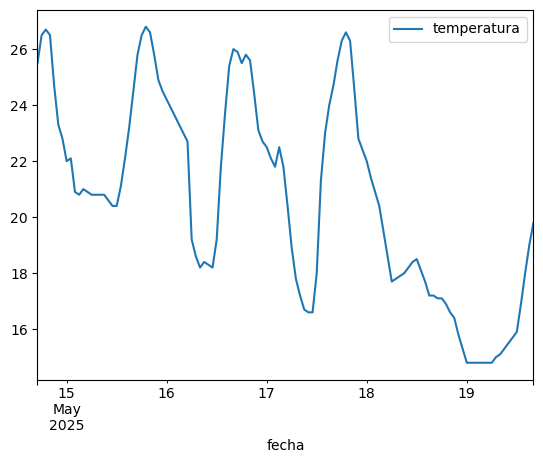

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Creo un pandas DataFrame a partir de un diccionario
df = pd.DataFrame(datos)
# Interpreto la fecha como fecha
df.fecha = pd.to_datetime(df.fecha)
df.set_index("fecha", inplace=True)

# Grafico el pronostico del clima
df.plot(y="temperatura")

<Axes: xlabel='fecha'>

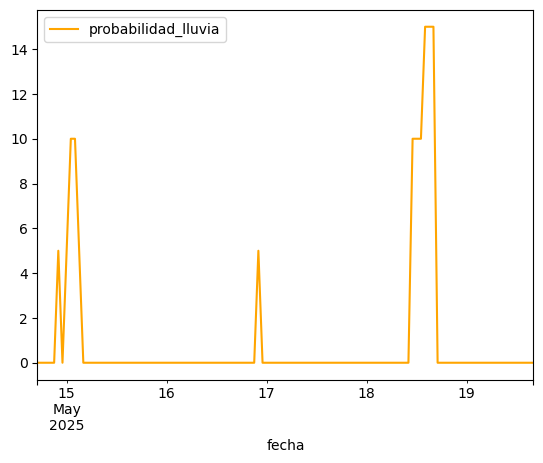

In [15]:
df.plot(y="probabilidad_lluvia", c="orange")